In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D

from preprocessing.getdata import *

In [ ]:
df = get_csvdata()
data = get_slices(df['ID'])

In [ ]:
HEIGHT = data.shape[1]
WIDTH = data.shape[2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df['CDR'], stratify = df['CDR'], random_state = 42)

In [ ]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(64, 3, activation="relu", padding="same"))
model.add(Conv2D(64, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units = 1, activation = 'sigmoid'))

#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_focal_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 208, 176, 64)      640       
                                                                 
 conv2d_27 (Conv2D)          (None, 208, 176, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 104, 88, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 104, 88, 128)      73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 104, 88, 128)      147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 52, 44, 128)      0         
 g2D)                                                 

In [ ]:
training = model.fit(X_train, y_train, batch_size = 10, validation_split=0.2, epochs = 100)

Epoch 1/100


2022-08-18 20:21:14.744894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - ETA: 0s - loss: 301244.3750 - accuracy: 0.5172

2022-08-18 20:21:30.984134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 18s 577ms/step - loss: 301244.3750 - accuracy: 0.5172 - val_loss: 0.1378 - val_accuracy: 0.7727
Epoch 2/100
27/27 [==============================] - 15s 541ms/step - loss: 0.4871 - accuracy: 0.6628 - val_loss: 0.1383 - val_accuracy: 0.7727
Epoch 3/100
27/27 [==============================] - 15s 537ms/step - loss: 0.3135 - accuracy: 0.7625 - val_loss: 0.1405 - val_accuracy: 0.7727
Epoch 4/100
27/27 [==============================] - 15s 571ms/step - loss: 0.1424 - accuracy: 0.7625 - val_loss: 0.1380 - val_accuracy: 0.7727
Epoch 5/100
 6/27 [=====>........................] - ETA: 12s - loss: 0.1543 - accuracy: 0.7167

KeyboardInterrupt: 

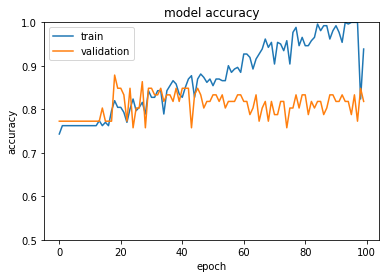

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.])
plt.show()

2022-08-18 15:07:09.923386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.82
recall:  0.7
precision:  0.55


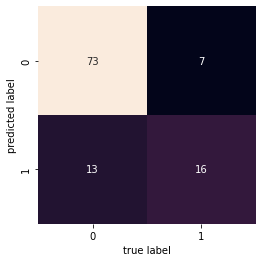

In [ ]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

(0.0, 1.1)

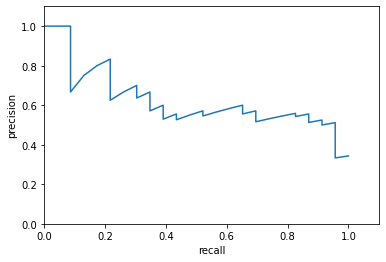

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])

In [ ]:
thresholds.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.001, 0.001, 0.001, 0.003, 0.003, 0.005,
       0.006, 0.006, 0.007, 0.008, 0.008, 0.014, 0.015, 0.018, 0.025,
       0.041, 0.046, 0.061, 0.065, 0.088, 0.09 , 0.124, 0.165, 0.173,
       0.206, 0.219, 0.284, 0.373, 0.38 , 0.413, 0.428, 0.443, 0.457,
       0.585, 0.734, 0.738], dtype=float32)